In [1]:
!pip install nltk

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/eru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/eru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
!pip install beautifulsoup4

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


In [6]:
from bs4 import BeautifulSoup

In [7]:
!pip install spacy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


In [8]:
import spacy

In [9]:
import random
import math
import string
import re
import csv
import json

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/eru/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/eru/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
dts_20k_raw = pd.read_csv("/Users/eru/AI.2021/NLP_Demo/dts_20k_raw.csv")
dts_20k_raw

,text,label
0,No Negative A very comfortable bed clean room ...,1
1,Bath could have been cleaner Loose boiler roo...,1
2,No Negative Friendly staff Excellent breakfast...,1
3,everything else bed,0
4,Very very clean big rooms & comfy beds. The pr...,1
...,...,...
19995,Bathroom cold water Great location,1
19996,Just have some problems with wireless interne...,1
19997,Bathroom was in a poor state of repair unable...,0
19998,Aircondition not working in most rooms Female...,0


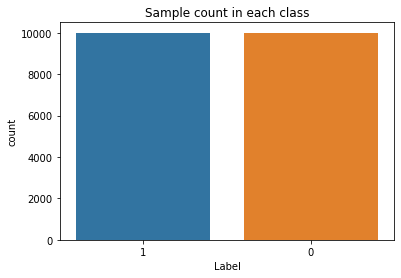

In [14]:
sns.countplot(
  x='label',
  data=dts_20k_raw,
  order=dts_20k_raw.label.value_counts().index
)

plt.xlabel("Label")
plt.title("Sample count in each class");

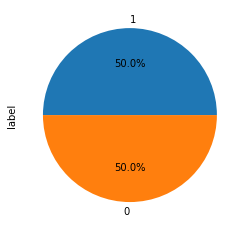

In [15]:
dts_20k_raw['label'].value_counts().plot.pie(autopct='%1.1f%%')

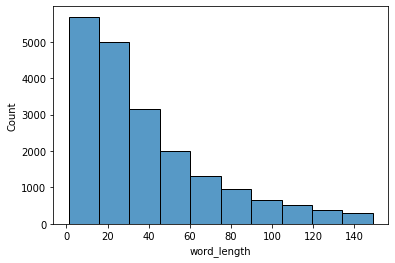

In [16]:
# df_raw_4['word_length'].hist()
def wl(text):
  return len(text.split(" "))
dts_20k_raw['word_length'] = dts_20k_raw['text'].apply(wl)
dts_20k_raw
sns.histplot(data=dts_20k_raw, x="word_length", bins=10)

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed

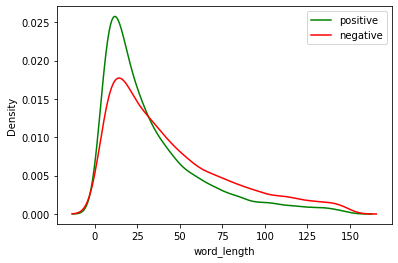

In [17]:
sns.kdeplot(dts_20k_raw[dts_20k_raw['label']==1]['word_length'],color='g')
sns.kdeplot(dts_20k_raw[dts_20k_raw['label']==0]['word_length'],color='r')
plt.legend(['positive','negative'])

In [18]:
def remove_url(text):
    return re.sub(r'http\S+', '', text)

In [19]:
def remove_tag(text):
    CLEANR = re.compile('<.*?>') 
    cleantext = re.sub(CLEANR, '', text)
    return cleantext

In [20]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [21]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    return (" ").join(tokens_without_sw)

In [22]:
txts = dts_20k_raw['text'].values.tolist()
txts

['No Negative A very comfortable bed clean room and a very good breakfast The best hotel I ve ever stayed in Paris for a decent price ',
 ' Bath could have been cleaner Loose boiler room door in room was shabby 260  Fluffy towels and sumptuous sheets Room had view of mews which was very quiet ',
 'No Negative Friendly staff Excellent breakfast Metro very close Clean ',
 ' everything else bed',
 'Very very clean big rooms & comfy beds. The property seemed full but very quiet. Excellent friendly & helpful staff. Very nice indoor pool. Restaurant very hand and good. Bar very nice also. Will definitely stay again!!!!',
 ' Our room seemed to have some electrical problems likely due to all of the fun decorations features that they added to the room For example the multitude of light switches for the bathroom seemed to have a different function each time they were used sometimes the lights would not even come on the jets for the bath tub did not work and the switch to raise and lower the tele

In [23]:
l = len(txts)
l

20000

In [24]:
# txts_2.append(txt.lower())
txts_2 = []
for i in range(l):
    txts_2.append(remove_url(txts[i]))
txts_2

['No Negative A very comfortable bed clean room and a very good breakfast The best hotel I ve ever stayed in Paris for a decent price ',
 ' Bath could have been cleaner Loose boiler room door in room was shabby 260  Fluffy towels and sumptuous sheets Room had view of mews which was very quiet ',
 'No Negative Friendly staff Excellent breakfast Metro very close Clean ',
 ' everything else bed',
 'Very very clean big rooms & comfy beds. The property seemed full but very quiet. Excellent friendly & helpful staff. Very nice indoor pool. Restaurant very hand and good. Bar very nice also. Will definitely stay again!!!!',
 ' Our room seemed to have some electrical problems likely due to all of the fun decorations features that they added to the room For example the multitude of light switches for the bathroom seemed to have a different function each time they were used sometimes the lights would not even come on the jets for the bath tub did not work and the switch to raise and lower the tele

In [25]:
txts_3 = []
for i in range(l):
    txts_3.append(remove_tag(txts_2[i]))
txts_3

['No Negative A very comfortable bed clean room and a very good breakfast The best hotel I ve ever stayed in Paris for a decent price ',
 ' Bath could have been cleaner Loose boiler room door in room was shabby 260  Fluffy towels and sumptuous sheets Room had view of mews which was very quiet ',
 'No Negative Friendly staff Excellent breakfast Metro very close Clean ',
 ' everything else bed',
 'Very very clean big rooms & comfy beds. The property seemed full but very quiet. Excellent friendly & helpful staff. Very nice indoor pool. Restaurant very hand and good. Bar very nice also. Will definitely stay again!!!!',
 ' Our room seemed to have some electrical problems likely due to all of the fun decorations features that they added to the room For example the multitude of light switches for the bathroom seemed to have a different function each time they were used sometimes the lights would not even come on the jets for the bath tub did not work and the switch to raise and lower the tele

In [26]:
txts_4 = []
for i in range(l):
    txts_4.append(remove_punc(txts_3[i]))
txts_4

['No Negative A very comfortable bed clean room and a very good breakfast The best hotel I ve ever stayed in Paris for a decent price ',
 ' Bath could have been cleaner Loose boiler room door in room was shabby 260  Fluffy towels and sumptuous sheets Room had view of mews which was very quiet ',
 'No Negative Friendly staff Excellent breakfast Metro very close Clean ',
 ' everything else bed',
 'Very very clean big rooms  comfy beds The property seemed full but very quiet Excellent friendly  helpful staff Very nice indoor pool Restaurant very hand and good Bar very nice also Will definitely stay again',
 ' Our room seemed to have some electrical problems likely due to all of the fun decorations features that they added to the room For example the multitude of light switches for the bathroom seemed to have a different function each time they were used sometimes the lights would not even come on the jets for the bath tub did not work and the switch to raise and lower the television from 

In [27]:
txts_5 = []
for i in range(l):
    txts_5.append(txts_4[i].lower())
txts_5

['no negative a very comfortable bed clean room and a very good breakfast the best hotel i ve ever stayed in paris for a decent price ',
 ' bath could have been cleaner loose boiler room door in room was shabby 260  fluffy towels and sumptuous sheets room had view of mews which was very quiet ',
 'no negative friendly staff excellent breakfast metro very close clean ',
 ' everything else bed',
 'very very clean big rooms  comfy beds the property seemed full but very quiet excellent friendly  helpful staff very nice indoor pool restaurant very hand and good bar very nice also will definitely stay again',
 ' our room seemed to have some electrical problems likely due to all of the fun decorations features that they added to the room for example the multitude of light switches for the bathroom seemed to have a different function each time they were used sometimes the lights would not even come on the jets for the bath tub did not work and the switch to raise and lower the television from 

In [ ]:
txts_6 = []
for i in range(l):
    txts_6.append(remove_stopword(txts_5[i]))
txts_6

In [ ]:
def lemmatize(lemmatizer, text):
    return lemmatizer.lemmatize(text)

In [ ]:
lemmatizer = WordNetLemmatizer()
# txts_10 = balanced_dts['text'].values.tolist()
txts_7 = []
for i in range(l):
    txts_7.append(lemmatize(lemmatizer, txts_6[i]))
txts_7

In [ ]:
labels = dts_20k_raw['label'].values.tolist()
labels

In [ ]:
len(labels)

In [ ]:
len(txts_8)

In [ ]:
data_tuples = list(zip(txts_7,labels))
data_tuples

In [ ]:
dts_20k_preprocessed = pd.DataFrame(data_tuples, columns=['text','label'])
dts_20k_preprocessed

In [ ]:
dts_20k_preprocessed.to_csv('dts_20k_preprocessed.csv', encoding='utf-8', index=False)